In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.functional import binary_cross_entropy
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

In [ ]:
# Load your DataFrame
df = pd.read_csv('/content/drive/MyDrive/Research files/mydf_filtered.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,gold,0.665368,0.575129,-0.233913,-0.803415,0.541873,-0.284748,-0.587410,0.304050,-0.976940,...,0.664564,-0.326792,-0.166843,0.089043,0.174635,0.708083,-0.211870,-0.922929,0.107179,0.442703
1,mines,-0.061983,-0.611545,0.075108,-1.006732,1.258891,-0.059213,-1.300372,-0.547770,0.142394,...,-0.045271,-0.081380,0.522956,-0.335626,0.570412,0.794796,-0.023208,0.021023,0.607977,-0.573830
2,creek,-0.047574,0.458035,0.221478,-0.578259,0.613073,-0.846475,-0.203815,1.112873,-1.040184,...,-0.104678,-0.689773,-0.158615,0.059416,1.047682,0.612500,0.655737,0.208093,-0.650601,-0.055082
3,work,0.488443,-0.393066,0.145720,-0.665517,0.423911,-0.420992,-0.329604,0.477476,-0.274982,...,-0.463748,0.348744,-0.168836,-0.793235,-0.274093,0.636341,0.018944,0.415261,0.409543,0.393351
4,copper,-0.012102,0.202483,0.003206,-0.243465,1.527658,-0.297196,-0.035213,0.253279,-0.732782,...,0.117608,-0.238600,-0.178582,-0.869530,-0.214733,0.395891,0.251760,0.630467,0.392041,0.138883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062,xanthate,-0.031826,0.257864,-0.054609,0.185644,-0.256702,0.007058,0.342248,0.009022,-0.007677,...,0.030342,0.134292,0.025772,0.166147,-0.060410,-0.262042,-0.027989,0.021065,-0.031498,-0.007414
12063,yauco,-0.129316,0.196438,0.083277,0.112372,-0.092597,-0.162406,0.167547,0.049535,-0.147225,...,0.039223,0.048401,-0.136274,0.303611,-0.034266,-0.222302,-0.050786,0.147664,0.082796,-0.038463
12064,yearbook,0.161926,-0.127037,-0.179428,0.064139,0.039060,0.316847,-0.100566,-0.017685,-0.085215,...,0.061324,-0.095374,0.105686,0.122895,0.311127,0.216142,-0.028143,0.326211,-0.248389,-0.068676
12065,yest,0.113457,-0.214988,0.029493,0.070235,0.015440,-0.153996,0.007843,-0.117899,-0.028560,...,0.016367,0.091974,-0.056424,0.105577,-0.001417,-0.104674,-0.058605,-0.099760,0.224277,-0.158745


In [ ]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
count,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,...,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000
mean,-0.027399,0.015862,0.003405,0.008238,-0.038007,0.008057,0.043922,-0.008589,0.019833,-0.015549,...,0.017557,-0.002793,-0.012807,0.034268,-0.003785,-0.043367,-0.030426,0.035665,-0.027366,-0.006802
std,0.307595,0.290350,0.277204,0.291848,0.305817,0.302322,0.326150,0.296629,0.304919,0.283236,...,0.276156,0.289755,0.281120,0.298441,0.301032,0.300895,0.302745,0.294590,0.277941,0.292891
min,-1.311899,-1.406599,-1.256535,-1.524590,-1.180786,-1.559808,-1.583537,-1.236944,-1.559583,-1.484612,...,-1.307726,-1.292197,-1.365566,-1.584046,-1.943242,-1.192825,-1.421033,-1.362443,-1.198696,-1.576195
25%,-0.214999,-0.146591,-0.169172,-0.151087,-0.233287,-0.165555,-0.127087,-0.188024,-0.144173,-0.179528,...,-0.145319,-0.175889,-0.175729,-0.132686,-0.181787,-0.230867,-0.212861,-0.134646,-0.200673,-0.185721
50%,-0.045903,0.026743,-0.013468,0.033841,-0.075638,0.031076,0.072425,-0.006744,0.049952,-0.013781,...,0.014184,-0.001458,-0.006815,0.049877,0.004979,-0.063988,-0.027015,0.045865,-0.043925,-0.015847
75%,0.141119,0.187868,0.157134,0.190358,0.114123,0.200858,0.249050,0.167548,0.209979,0.146655,...,0.180335,0.171276,0.155549,0.215975,0.182050,0.121666,0.149062,0.217680,0.126860,0.162010
max,1.480457,1.325984,1.436909,1.305362,1.567197,1.275238,1.370953,1.236716,1.280048,1.413937,...,1.263812,1.207577,1.519938,1.471298,1.401257,1.517916,1.440244,1.234366,1.328742,1.331931


In [ ]:
# Drop the first column (words) to keep only embeddings
words = df.iloc[:, 0].values
embeddings = df.iloc[:, 1:].values  # Assuming embeddings start from the second column

# Convert to PyTorch tensors
word_embeddings = torch.tensor(embeddings, dtype=torch.float32)

# Create DataLoader
dataset = TensorDataset(word_embeddings)
# Split into train and test datasets
train_size = int(0.8 * len(dataset))  # 80% training data
test_size = len(dataset) - train_size  # 20% test data
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# class VAE(nn.Module):
#     def __init__(self, input_dim, hidden_dim, latent_dim):
#         super(VAE, self).__init__()

#         # Encoder
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.fc2_mu = nn.Linear(hidden_dim, latent_dim)  # Mean vector
#         self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)  # Log variance vector

#         # Decoder
#         self.fc3 = nn.Linear(latent_dim, hidden_dim)
#         self.fc4 = nn.Linear(hidden_dim, input_dim)

#     def encode(self, x):
#         h1 = torch.relu(self.fc1(x))
#         mu = self.fc2_mu(h1)
#         logvar = self.fc2_logvar(h1)
#         return mu, logvar

#     def reparameterize(self, mu, logvar):
#         std = torch.exp(0.5 * logvar)
#         eps = torch.randn_like(std)
#         return mu + eps * std

#     def decode(self, z):
#         h3 = torch.relu(self.fc3(z))
#         return torch.sigmoid(self.fc4(h3))

#     def forward(self, x):
#         mu, logvar = self.encode(x)
#         z = self.reparameterize(mu, logvar)
#         return self.decode(z), mu, logvar

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        # Calculate the hidden dimensions for the encoder and decoder
        hidden_dims = [128, 64, 32]

        # Encoder layers
        self.encoder_layers = nn.ModuleList()
        previous_dim = input_dim
        for h_dim in hidden_dims:
            self.encoder_layers.append(nn.Linear(previous_dim, h_dim))
            previous_dim = h_dim

        # Latent layers (mean and log variance)
        self.fc_mu = nn.Linear(previous_dim, latent_dim)
        self.fc_logvar = nn.Linear(previous_dim, latent_dim)

        # Decoder layers
        hidden_dims.reverse()
        self.decoder_layers = nn.ModuleList()
        previous_dim = latent_dim
        for h_dim in hidden_dims:
            self.decoder_layers.append(nn.Linear(previous_dim, h_dim))
            previous_dim = h_dim

        # Final layer to reconstruct the input
        self.fc_out = nn.Linear(previous_dim, input_dim)

    def encode(self, x):
        for layer in self.encoder_layers:
            x = torch.relu(layer(x))
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        for layer in self.decoder_layers:
            z = torch.relu(layer(z))
        return self.fc_out(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction loss
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')

    # KL divergence
    # kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kld_loss = 0

    return recon_loss + kld_loss

In [ ]:
# Set dimensions
input_dim = word_embeddings.shape[1]
latent_dim = 16

# Initialize the model, optimizer, and loss function
model = VAE(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 20  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        data = batch[0]

        # Ensure data is properly shaped for LSTM input
        data = data.unsqueeze(1)  # Add sequence length dimension

        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)

        # Ensure recon_batch is of the same shape as data
        recon_batch = recon_batch.view_as(data)

        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    # Calculate average loss for the training epoch
    average_train_loss = train_loss / len(train_loader.dataset)

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0
    with torch.no_grad():  # Disable gradient computation during testing
        for batch in test_loader:
            data = batch[0]

            # Ensure data is properly shaped for LSTM input
            data = data.unsqueeze(1)  # Add sequence length dimension

            recon_batch, mu, logvar = model(data)

            # Ensure recon_batch is of the same shape as data
            recon_batch = recon_batch.view_as(data)

            loss = vae_loss(recon_batch, data, mu, logvar)
            test_loss += loss.item()

    # Calculate average loss for the test epoch
    average_test_loss = test_loss / len(test_loader.dataset)

    print(f'Epoch {epoch+1}, Train Loss: {average_train_loss:.4f}, Test Loss: {average_test_loss:.4f}')

Epoch 1, Train Loss: 16.1969, Test Loss: 15.3268
Epoch 2, Train Loss: 14.7393, Test Loss: 14.5946
Epoch 3, Train Loss: 14.2467, Test Loss: 14.2596
Epoch 4, Train Loss: 13.9158, Test Loss: 13.9919
Epoch 5, Train Loss: 13.6489, Test Loss: 13.7865
Epoch 6, Train Loss: 13.4194, Test Loss: 13.6210
Epoch 7, Train Loss: 13.2430, Test Loss: 13.5232
Epoch 8, Train Loss: 13.0735, Test Loss: 13.4079
Epoch 9, Train Loss: 12.9516, Test Loss: 13.2811
Epoch 10, Train Loss: 12.8324, Test Loss: 13.2294
Epoch 11, Train Loss: 12.7119, Test Loss: 13.1504
Epoch 12, Train Loss: 12.6144, Test Loss: 13.0564
Epoch 13, Train Loss: 12.5131, Test Loss: 13.0096
Epoch 14, Train Loss: 12.4243, Test Loss: 12.9657
Epoch 15, Train Loss: 12.3355, Test Loss: 12.8710
Epoch 16, Train Loss: 12.2572, Test Loss: 12.8504
Epoch 17, Train Loss: 12.1939, Test Loss: 12.7784
Epoch 18, Train Loss: 12.1341, Test Loss: 12.7506
Epoch 19, Train Loss: 12.0889, Test Loss: 12.7372
Epoch 20, Train Loss: 12.0483, Test Loss: 12.7435


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        # Calculate the hidden dimensions for the encoder and decoder
        hidden_dims = [128, 64, 32, 16, 8]

        # Encoder layers
        self.encoder_layers = nn.ModuleList()
        previous_dim = input_dim
        for h_dim in hidden_dims:
            self.encoder_layers.append(nn.Linear(previous_dim, h_dim))
            previous_dim = h_dim

        # Latent layers (mean and log variance)
        self.fc_mu = nn.Linear(previous_dim, latent_dim)
        self.fc_logvar = nn.Linear(previous_dim, latent_dim)

        # Decoder layers
        hidden_dims.reverse()
        self.decoder_layers = nn.ModuleList()
        previous_dim = latent_dim
        for h_dim in hidden_dims:
            self.decoder_layers.append(nn.Linear(previous_dim, h_dim))
            previous_dim = h_dim

        # Final layer to reconstruct the input
        self.fc_out = nn.Linear(previous_dim, input_dim)

    def encode(self, x):
        for layer in self.encoder_layers:
            x = torch.relu(layer(x))
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        for layer in self.decoder_layers:
            z = torch.relu(layer(z))
        return self.fc_out(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction loss
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')

    # KL divergence
    # kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    kld_loss = 0

    return recon_loss + kld_loss

In [ ]:
# Set dimensions
input_dim = word_embeddings.shape[1]
latent_dim = 2

# Initialize the model, optimizer, and loss function
model = VAE(input_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 20  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        data = batch[0]

        # Ensure data is properly shaped for LSTM input
        data = data.unsqueeze(1)  # Add sequence length dimension

        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)

        # Ensure recon_batch is of the same shape as data
        recon_batch = recon_batch.view_as(data)

        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    # Calculate average loss for the training epoch
    average_train_loss = train_loss / len(train_loader.dataset)

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0
    with torch.no_grad():  # Disable gradient computation during testing
        for batch in test_loader:
            data = batch[0]

            # Ensure data is properly shaped for LSTM input
            data = data.unsqueeze(1)  # Add sequence length dimension

            recon_batch, mu, logvar = model(data)

            # Ensure recon_batch is of the same shape as data
            recon_batch = recon_batch.view_as(data)

            loss = vae_loss(recon_batch, data, mu, logvar)
            test_loss += loss.item()

    # Calculate average loss for the test epoch
    average_test_loss = test_loss / len(test_loader.dataset)

    print(f'Epoch {epoch+1}, Train Loss: {average_train_loss:.4f}, Test Loss: {average_test_loss:.4f}')

Epoch 1, Train Loss: 16.4944, Test Loss: 16.1888
Epoch 2, Train Loss: 15.9180, Test Loss: 15.7375
Epoch 3, Train Loss: 15.5219, Test Loss: 15.5186
Epoch 4, Train Loss: 15.3643, Test Loss: 15.4394
Epoch 5, Train Loss: 15.2936, Test Loss: 15.4130
Epoch 6, Train Loss: 15.2395, Test Loss: 15.3670
Epoch 7, Train Loss: 15.2058, Test Loss: 15.3578
Epoch 8, Train Loss: 15.1672, Test Loss: 15.3457
Epoch 9, Train Loss: 15.1281, Test Loss: 15.2972
Epoch 10, Train Loss: 15.0970, Test Loss: 15.3303
Epoch 11, Train Loss: 15.0613, Test Loss: 15.2822
Epoch 12, Train Loss: 15.0381, Test Loss: 15.2463
Epoch 13, Train Loss: 15.0122, Test Loss: 15.2518
Epoch 14, Train Loss: 15.0063, Test Loss: 15.2076
Epoch 15, Train Loss: 14.9730, Test Loss: 15.2117
Epoch 16, Train Loss: 14.9500, Test Loss: 15.2090
Epoch 17, Train Loss: 14.9185, Test Loss: 15.2045
Epoch 18, Train Loss: 14.9013, Test Loss: 15.2088
Epoch 19, Train Loss: 14.9262, Test Loss: 15.1668
Epoch 20, Train Loss: 14.8773, Test Loss: 15.1590


In [ ]:
# Ensure the model is in evaluation mode
model.eval()

# Reconstruct the word embeddings
with torch.no_grad():
    # Encode the original embeddings to get the latent variables
    mu, logvar = model.encode(word_embeddings)
    z = model.reparameterize(mu, logvar)

    # Decode the latent variables to get the reconstructed embeddings
    reconstructed_embeddings = model.decode(z)

# Convert the reconstructed embeddings back to a numpy array
reconstructed_embeddings = reconstructed_embeddings.numpy()

In [ ]:
# Example comparison of original and reconstructed embeddings for the first word
original_embedding = word_embeddings[0].numpy()
reconstructed_embedding = reconstructed_embeddings[0]

print("Original Embedding: ", original_embedding[:10])  # Print first 10 values
print("Reconstructed Embedding: ", reconstructed_embedding[:10])  # Print first 10 values

# Compute the reconstruction error (mean squared error)
reconstruction_error = np.mean((original_embedding - reconstructed_embedding) ** 2)
print("Reconstruction Error: ", reconstruction_error)

Original Embedding:  [ 0.665368  0.575129 -0.233913 -0.803415  0.541873 -0.284748 -0.58741
  0.30405  -0.97694   0.118942]
Reconstructed Embedding:  [ 0.69218946 -0.2886678   0.21626611 -0.7343969   0.75594604 -0.48348445
 -0.7952655   0.18787578 -0.65580374 -0.13007212]
Reconstruction Error:  0.17488605


**After this one, it's time to make into graphs**

VAE did some works, let's see if the result is worth it.

cities should be highlighted an a keyword as something that shows how all of them are aligned.

In [ ]:
# Load your DataFrame
cities_df = pd.read_csv('/content/drive/MyDrive/Research files/worldcities.csv')
cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [ ]:
cities_df['city'] = cities_df['city'].str.lower()
city_names = cities_df['city'].values
cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,san rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [ ]:
# Load your DataFrame
embeddings_df = pd.read_csv('/content/drive/MyDrive/Research files/mydf_filtered.csv')
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,gold,0.665368,0.575129,-0.233913,-0.803415,0.541873,-0.284748,-0.587410,0.304050,-0.976940,...,0.664564,-0.326792,-0.166843,0.089043,0.174635,0.708083,-0.211870,-0.922929,0.107179,0.442703
1,mines,-0.061983,-0.611545,0.075108,-1.006732,1.258891,-0.059213,-1.300372,-0.547770,0.142394,...,-0.045271,-0.081380,0.522956,-0.335626,0.570412,0.794796,-0.023208,0.021023,0.607977,-0.573830
2,creek,-0.047574,0.458035,0.221478,-0.578259,0.613073,-0.846475,-0.203815,1.112873,-1.040184,...,-0.104678,-0.689773,-0.158615,0.059416,1.047682,0.612500,0.655737,0.208093,-0.650601,-0.055082
3,work,0.488443,-0.393066,0.145720,-0.665517,0.423911,-0.420992,-0.329604,0.477476,-0.274982,...,-0.463748,0.348744,-0.168836,-0.793235,-0.274093,0.636341,0.018944,0.415261,0.409543,0.393351
4,copper,-0.012102,0.202483,0.003206,-0.243465,1.527658,-0.297196,-0.035213,0.253279,-0.732782,...,0.117608,-0.238600,-0.178582,-0.869530,-0.214733,0.395891,0.251760,0.630467,0.392041,0.138883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062,xanthate,-0.031826,0.257864,-0.054609,0.185644,-0.256702,0.007058,0.342248,0.009022,-0.007677,...,0.030342,0.134292,0.025772,0.166147,-0.060410,-0.262042,-0.027989,0.021065,-0.031498,-0.007414
12063,yauco,-0.129316,0.196438,0.083277,0.112372,-0.092597,-0.162406,0.167547,0.049535,-0.147225,...,0.039223,0.048401,-0.136274,0.303611,-0.034266,-0.222302,-0.050786,0.147664,0.082796,-0.038463
12064,yearbook,0.161926,-0.127037,-0.179428,0.064139,0.039060,0.316847,-0.100566,-0.017685,-0.085215,...,0.061324,-0.095374,0.105686,0.122895,0.311127,0.216142,-0.028143,0.326211,-0.248389,-0.068676
12065,yest,0.113457,-0.214988,0.029493,0.070235,0.015440,-0.153996,0.007843,-0.117899,-0.028560,...,0.016367,0.091974,-0.056424,0.105577,-0.001417,-0.104674,-0.058605,-0.099760,0.224277,-0.158745


In [ ]:
embeddings_df.set_index(embeddings_df.columns[0], inplace = True)

In [ ]:
embeddings_df

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,,,,,,,,,,,,,,,,,,,,,
gold,0.665368,0.575129,-0.233913,-0.803415,0.541873,-0.284748,-0.587410,0.304050,-0.976940,0.118942,...,0.664564,-0.326792,-0.166843,0.089043,0.174635,0.708083,-0.211870,-0.922929,0.107179,0.442703
mines,-0.061983,-0.611545,0.075108,-1.006732,1.258891,-0.059213,-1.300372,-0.547770,0.142394,-0.026691,...,-0.045271,-0.081380,0.522956,-0.335626,0.570412,0.794796,-0.023208,0.021023,0.607977,-0.573830
creek,-0.047574,0.458035,0.221478,-0.578259,0.613073,-0.846475,-0.203815,1.112873,-1.040184,-0.040763,...,-0.104678,-0.689773,-0.158615,0.059416,1.047682,0.612500,0.655737,0.208093,-0.650601,-0.055082
work,0.488443,-0.393066,0.145720,-0.665517,0.423911,-0.420992,-0.329604,0.477476,-0.274982,0.433945,...,-0.463748,0.348744,-0.168836,-0.793235,-0.274093,0.636341,0.018944,0.415261,0.409543,0.393351
copper,-0.012102,0.202483,0.003206,-0.243465,1.527658,-0.297196,-0.035213,0.253279,-0.732782,-0.270034,...,0.117608,-0.238600,-0.178582,-0.869530,-0.214733,0.395891,0.251760,0.630467,0.392041,0.138883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xanthate,-0.031826,0.257864,-0.054609,0.185644,-0.256702,0.007058,0.342248,0.009022,-0.007677,0.069153,...,0.030342,0.134292,0.025772,0.166147,-0.060410,-0.262042,-0.027989,0.021065,-0.031498,-0.007414
yauco,-0.129316,0.196438,0.083277,0.112372,-0.092597,-0.162406,0.167547,0.049535,-0.147225,-0.122920,...,0.039223,0.048401,-0.136274,0.303611,-0.034266,-0.222302,-0.050786,0.147664,0.082796,-0.038463
yearbook,0.161926,-0.127037,-0.179428,0.064139,0.039060,0.316847,-0.100566,-0.017685,-0.085215,-0.030961,...,0.061324,-0.095374,0.105686,0.122895,0.311127,0.216142,-0.028143,0.326211,-0.248389,-0.068676


In [ ]:
# Encode the embeddings to 2D
model.eval()
with torch.no_grad():
    z_mu, _ = model.encode(word_embeddings)

In [ ]:
# Convert encoded embeddings to pandas DataFrame for easier manipulation
encoded_df = pd.DataFrame(z_mu.numpy(), index=embeddings_df.index, columns=['Dim1', 'Dim2'])
encoded_df

,Dim1,Dim2
0,,
gold,29.317108,-4.620698
mines,-7.578801,7.181571
creek,6.279577,57.479565
work,28.323799,-2.563523
copper,27.627247,-3.591809
...,...,...
xanthate,0.797666,1.258168
yauco,1.551229,0.329604
yearbook,-0.322063,-0.829612


In [ ]:
# # Add the words as the first column
# encoded_df.insert(0, 'Word', words)

# # Save to CSV file
# encoded_df.to_csv('/content/drive/MyDrive/Research files/VAE_reduced_data.csv', index=False)

# encoded_df

,Word,Dim1,Dim2
0,,,
gold,gold,29.317108,-4.620698
mines,mines,-7.578801,7.181571
creek,creek,6.279577,57.479565
work,work,28.323799,-2.563523
copper,copper,27.627247,-3.591809
...,...,...,...
xanthate,xanthate,0.797666,1.258168
yauco,yauco,1.551229,0.329604
yearbook,yearbook,-0.322063,-0.829612


In [ ]:
# Identify the rows corresponding to city names
encoded_city_df = encoded_df[encoded_df.index.isin(city_names)]
encoded_city_df

,Dim1,Dim2
0,,
gold,29.317108,-4.620698
coal,18.576988,-5.758658
columbia,-4.528556,-17.573227
vancouver,10.496822,35.182869
street,7.420881,37.761059
...,...,...
shiloh,-0.338687,0.362668
takahashi,-0.610853,0.898057
una,0.552685,0.668158


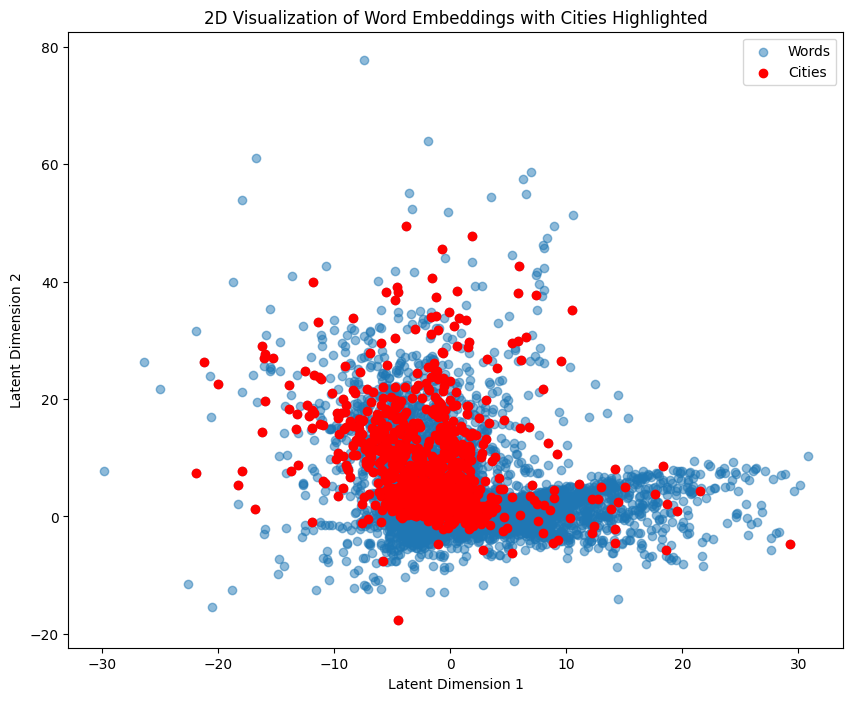

In [ ]:
import matplotlib.pyplot as plt

# Plot the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(encoded_df['Dim1'], encoded_df['Dim2'], alpha=0.5, label='Words')
plt.scatter(encoded_city_df['Dim1'], encoded_city_df['Dim2'], color='red', label='Cities')
plt.legend()
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Visualization of Word Embeddings with Cities Highlighted')
plt.show()

In [ ]:
# Identify the keyword and its position
keyword = 'lithium'  # Replace with your keyword
if keyword in encoded_df.index:
    keyword_position = encoded_df.loc[keyword].values
else:
    raise ValueError(f'Keyword "{keyword}" not found in the DataFrame.')

In [ ]:
from scipy.spatial.distance import cdist

# Calculate distances from the keyword to all city embeddings
city_positions = encoded_df[encoded_df.index.isin(city_names)].values
distances = cdist([keyword_position], city_positions, metric='euclidean').flatten()

In [ ]:
# Find the closest cities
num_closest = 10  # Number of closest cities to display
# Sort the distances and get indices of the closest cities
closest_indices = distances.argsort()[:num_closest]
closest_cities = encoded_df[encoded_df.index.isin(city_names)].iloc[closest_indices].index
closest_distances = distances[closest_indices]

In [ ]:
closest_cities

Index(['ino', 'stanton', 'una', 'alvin', 'prichard', 'alba', 'fresno',
       'moline', 'shiloh', 'tota'],
      dtype='object', name='0')

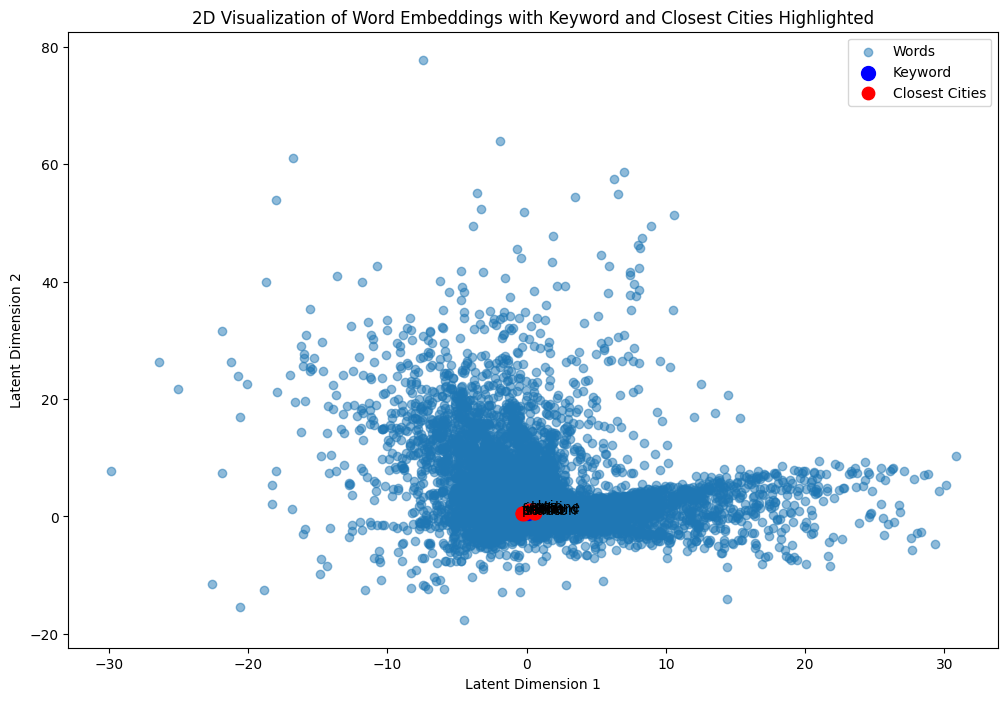

In [ ]:
# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(encoded_df['Dim1'], encoded_df['Dim2'], alpha=0.5, label='Words')
plt.scatter(encoded_df.loc[keyword, 'Dim1'], encoded_df.loc[keyword, 'Dim2'], color='blue', s=100, label='Keyword')
plt.scatter(encoded_df.loc[closest_cities, 'Dim1'], encoded_df.loc[closest_cities, 'Dim2'], color='red', s=80, label='Closest Cities')

# Annotate closest cities
for city, (dim1, dim2) in zip(closest_cities, encoded_df.loc[closest_cities].values):
    plt.annotate(city, (dim1, dim2))

plt.legend()
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Visualization of Word Embeddings with Keyword and Closest Cities Highlighted')
plt.show()

**Alrighty, That 'kinda' works out**.
-
- But can we do on better though?
-
- Let's try t-SNE to help project into 2D better.


- So VAE have to change from doing 2d by itself
- to have some room for t-SNE

In [ ]:
latent_3d_dim = 3

# Initialize the model, optimizer, and train the VAE
vae = VAE(input_dim, latent_3d_dim)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

In [ ]:
# Training loop
epochs = 50
for epoch in range(epochs):
    vae.train()
    optimizer.zero_grad()
    recon_batch, mu, logvar = vae(word_embeddings)
    loss = vae_loss(recon_batch, word_embeddings, mu, logvar)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Epoch 1, Loss: 216862.1875
Epoch 2, Loss: 214425.0625
Epoch 3, Loss: 212454.765625
Epoch 4, Loss: 210858.3125
Epoch 5, Loss: 209544.875
Epoch 6, Loss: 208454.28125
Epoch 7, Loss: 207545.46875
Epoch 8, Loss: 206786.34375
Epoch 9, Loss: 206160.953125
Epoch 10, Loss: 205664.359375
Epoch 11, Loss: 205266.859375
Epoch 12, Loss: 204961.703125
Epoch 13, Loss: 204733.28125
Epoch 14, Loss: 204574.25
Epoch 15, Loss: 204456.84375
Epoch 16, Loss: 204368.71875
Epoch 17, Loss: 204297.078125
Epoch 18, Loss: 204245.171875
Epoch 19, Loss: 204201.359375
Epoch 20, Loss: 204163.4375
Epoch 21, Loss: 204125.75
Epoch 22, Loss: 204103.53125
Epoch 23, Loss: 204084.734375
Epoch 24, Loss: 204061.3125
Epoch 25, Loss: 204035.53125
Epoch 26, Loss: 204023.078125
Epoch 27, Loss: 204007.65625
Epoch 28, Loss: 203996.875
Epoch 29, Loss: 203983.5
Epoch 30, Loss: 203969.578125
Epoch 31, Loss: 203958.1875
Epoch 32, Loss: 203946.296875
Epoch 33, Loss: 203935.171875
Epoch 34, Loss: 203925.546875
Epoch 35, Loss: 203916.109375

In [ ]:
# Encode the embeddings to 3D
model.eval()
with torch.no_grad():
    z_mu, _ = vae.encode(word_embeddings)

In [ ]:
# Convert encoded embeddings to pandas DataFrame for easier manipulation
encoded_3d_df = pd.DataFrame(z_mu.numpy(), index=embeddings_df.index, columns=['Dim1', 'Dim2','Dim3'])
encoded_3d_df

,Dim1,Dim2,Dim3
0,,,
gold,1.204274,2.058592,1.117804
mines,0.921714,1.613419,0.766575
creek,1.011519,1.756268,0.881587
work,0.957634,1.670640,0.813638
copper,1.075202,1.856588,0.962540
...,...,...,...
xanthate,-0.028369,-0.160583,-0.618427
yauco,-0.018595,-0.135408,-0.602308
yearbook,0.084362,0.156600,-0.346045


In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to further reduce the latent space to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(z_mu.numpy())

In [ ]:
# Convert t-SNE results to a pandas DataFrame
tsne_df = pd.DataFrame(tsne_results, index=embeddings_df.index, columns=['Dim1', 'Dim2'])
tsne_df

,Dim1,Dim2
0,,
gold,105.472992,-19.064550
mines,104.152466,-15.930144
creek,104.976479,-18.021936
work,104.545067,-16.975855
copper,105.277924,-18.664835
...,...,...
xanthate,-24.968462,49.683643
yauco,-33.016045,11.602411
yearbook,27.356239,45.526188


In [ ]:
# Identify the keyword and its position
keyword = 'lithium'  # Replace with your keyword
if keyword in tsne_df.index:
    keyword_position = tsne_df.loc[keyword].values
else:
    raise ValueError(f'Keyword "{keyword}" not found in the DataFrame.')


In [ ]:
# Calculate distances from the keyword to all city embeddings
city_positions = tsne_df[tsne_df.index.isin(city_names)].values
distances = cdist([keyword_position], city_positions, metric='euclidean').flatten()


In [ ]:
num_closest = 5  # Number of closest cities to display
# Sort the distances and get indices of the closest cities
closest_indices = distances.argsort()[:num_closest]
closest_cities = tsne_df[tsne_df.index.isin(city_names)].iloc[closest_indices].index
closest_distances = distances[closest_indices]
closest_cities

Index(['manila', 'crestview', 'college', 'sharon', 'bellevue'], dtype='object', name='0')

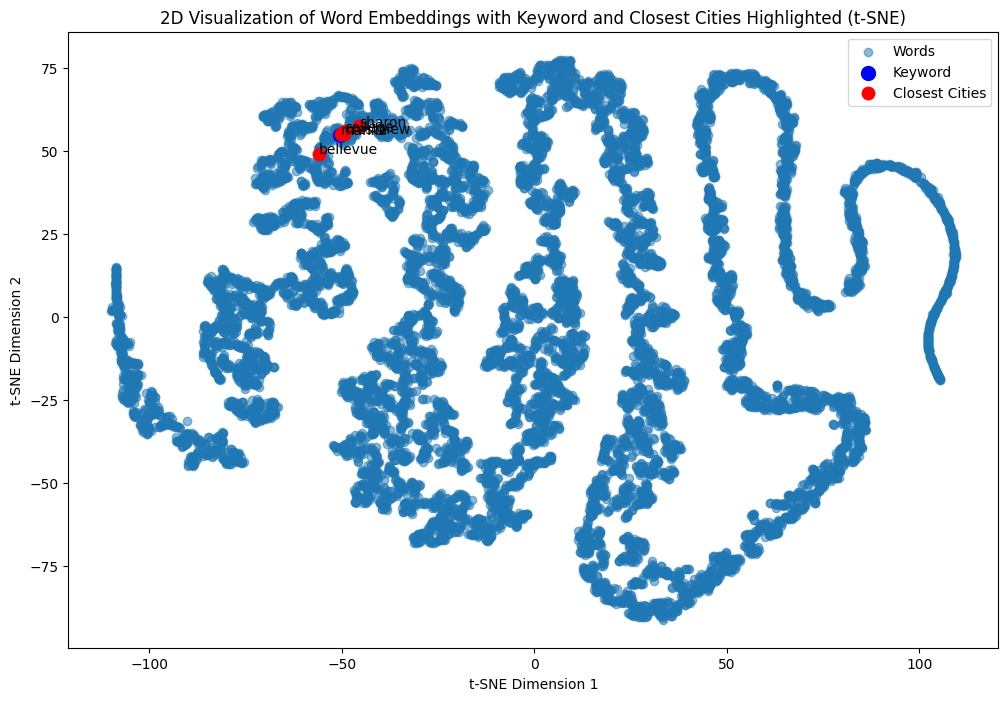

In [ ]:
# Plot the 2D t-SNE embeddings
plt.figure(figsize=(12, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], alpha=0.5, label='Words')
plt.scatter(tsne_df.loc[keyword, 'Dim1'], tsne_df.loc[keyword, 'Dim2'], color='blue', s=100, label='Keyword')
plt.scatter(tsne_df.loc[closest_cities, 'Dim1'], tsne_df.loc[closest_cities, 'Dim2'], color='red', s=80, label='Closest Cities')

# Annotate closest cities
for city, (dim1, dim2) in zip(closest_cities, tsne_df.loc[closest_cities].values):
    plt.annotate(city, (dim1, dim2))

plt.legend()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D Visualization of Word Embeddings with Keyword and Closest Cities Highlighted (t-SNE)')
plt.show()

In [ ]:
tsne_city_df = tsne_df[tsne_df.index.isin(city_names)]
tsne_city_df

,Dim1,Dim2
0,,
gold,105.472992,-19.064550
coal,104.034874,-15.609004
columbia,102.615707,-3.171734
vancouver,102.375664,-9.710280
street,107.787582,29.172190
...,...,...
shiloh,-31.995440,-50.153797
takahashi,8.635939,5.072637
una,-24.899414,12.562865


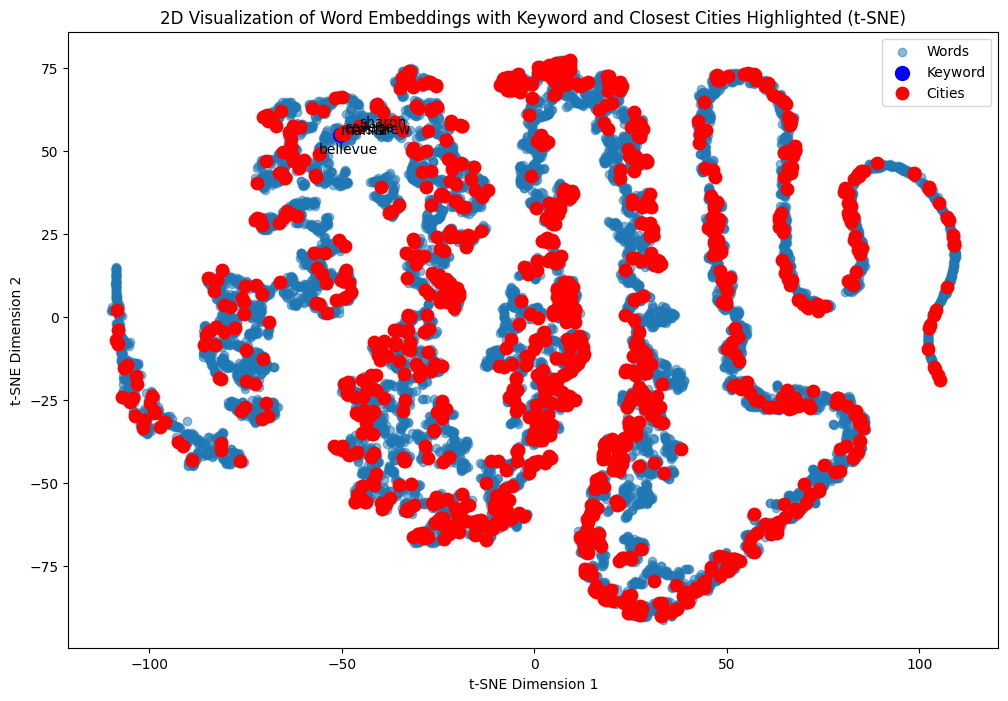

In [ ]:
# Plot the 2D t-SNE embeddings
plt.figure(figsize=(12, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], alpha=0.5, label='Words')
plt.scatter(tsne_df.loc[keyword, 'Dim1'], tsne_df.loc[keyword, 'Dim2'], color='blue', s=100, label='Keyword')
plt.scatter(tsne_city_df['Dim1'], tsne_city_df['Dim2'], color='red', s=80, label='Cities')

# Annotate closest cities
for city, (dim1, dim2) in zip(closest_cities, tsne_df.loc[closest_cities].values):
    plt.annotate(city, (dim1, dim2))

plt.legend()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D Visualization of Word Embeddings with Keyword and Closest Cities Highlighted (t-SNE)')
plt.show()